### Very Coarse 15x25 Data

In [1]:
import new_environment2
from deep_learning_realdata import DeepQNetwork, Agent
from utils import plotLearning
import numpy as np
from gym import wrappers
import matplotlib.pyplot as plt

#### Train Agent

done initializing memory
starting game  1 epsilon: 1.0000


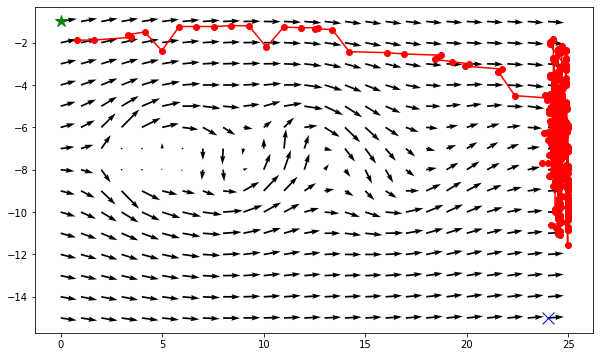

score: -500
starting game  2 epsilon: 1.0000
score: -500
starting game  3 epsilon: 0.9500
score: -500
starting game  4 epsilon: 0.9000
score: -500
starting game  5 epsilon: 0.8500
score: -500
starting game  6 epsilon: 0.8000
score: -500
starting game  7 epsilon: 0.7500


KeyboardInterrupt: 

In [2]:
if __name__ == '__main__':
    env = new_environment2.AgentEnv(withFlow = True, dim = (15,25), vel = 1)
    brain = Agent(gamma=0.95, epsilon=1.0, 
                  alpha=0.0005, maxMemorySize=5000,
                  replace=None)
    while brain.memCntr < brain.memSize:
        observation,_,_ = env.reset()
        done = False
        while not done:
            action = np.random.randint(0, env.action_space)
            observation_, reward, done = env.action(action)
            brain.storeTransition(observation, action,reward, observation)
            observation = observation_
    print('done initializing memory')

    scores = []
    epsHistory = []
    numGames = 50
    batch_size=64
    save_loss = []
    SHOW = 12


    for i in range(numGames):
        print('starting game ', i+1, 'epsilon: %.4f' % brain.EPSILON)
        epsHistory.append(brain.EPSILON)
        done = False
        observation,_,_ = env.reset()
        score = 0
        lastAction = 0
        steps = 0
        xpath = []
        ypath = []
        while not done: #and steps < 1000:
            steps += 1
            action = brain.chooseAction(observation)
            observation_, reward, done = env.action(action)
            score += reward
            
            brain.storeTransition(observation, action, reward,
                                  observation)
            observation = observation_
            loss = brain.learn(batch_size)
          #  print(f"loss is {loss}")
            lastAction = action
            xpath.append(env.x)
            ypath.append(env.y)
        
         #show path:
        if i % SHOW == 0:
            fig, ax = plt.subplots(figsize=(10,6))
            x = [0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
            y = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15] 
            X,Y = np.meshgrid(x,y)
            u = env.field.vx[y]
            v = env.field.vy[y]
            ax.quiver(X,Y,u,v)
            plt.plot(xpath,[i * -1 - 1 for i in ypath], marker = 'o', color = 'red')
            plt.plot([0],[-1], marker = '*', color = 'green', markersize = 12)#start
            plt.plot([24],[-15], marker = 'x', color = 'blue', markersize = 12)#goal
            plt.show()
            
        scores.append(score)
        save_loss.append(loss.item())
        print('score:',score)
    x = [i+1 for i in range(numGames)]
    fileName = str(numGames) + 'Games' + 'Gamma' + str(brain.GAMMA) + \
               'Alpha' + str(brain.ALPHA) + 'Memory' + str(brain.memSize)+ '.png'
    plotLearning(x, scores, epsHistory, fileName)
    plotLearning(x,save_loss,epsHistory, filename = "loss_plot4.png")

#### Test Agent

In [ ]:
numGames = 3
scores = []
xpath = []
ypath = []
for i in range(numGames):
    x = []
    
    y = []
    done = False
    observation,_,_ = env.reset()
    print(observation)
    x.append(env.x)
    y.append(env.y)
    score = 0
    while not done:
        action = brain.chooseAction(observation)
        observation_, reward, done = env.action(action)
        x.append(env.x)
        y.append(env.y)
        observation = observation_
        score += reward
    scores.append(score)
    xpath.append(x)
    ypath.append(y)
    print('score:',score)

#### Plot Paths

Test 1

In [ ]:
#plt.imshow(env.field.vx)
fig, ax = plt.subplots(figsize=(10,6))
x = [0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15] 
X,Y = np.meshgrid(x,y)
u = env.field.vx[y]
v = env.field.vy[y]
ax.quiver(X,Y,u,v)
plt.plot(xpath[0],[i * -1 - 1 for i in ypath[0]], marker = 'o', color = 'red')
plt.plot([0],[-1], marker = '*', color = 'green', markersize = 12)#start
plt.plot([24],[-15], marker = 'x', color = 'blue', markersize = 12)#goal
plt.show()

Test 2

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
x = [0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15] 
X,Y = np.meshgrid(x,y)
u = env.field.vx[y]
v = env.field.vy[y]
ax.quiver(X,Y,u,v)
plt.plot(xpath[1],[i * -1 - 1 for i in ypath[1]], marker = 'o', color = 'red')
plt.plot([0],[-1], marker = '*', color = 'green', markersize = 12)#start
plt.plot([24],[-15], marker = 'x', color = 'blue', markersize = 12)#goal
plt.show()

Test 3

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
x = [0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15] 
X,Y = np.meshgrid(x,y)
u = env.field.vx[y]
v = env.field.vy[y]
ax.quiver(X,Y,u,v)
plt.plot(xpath[2],[i * -1 - 1 for i in ypath[2]], marker = 'o', color = 'red')
plt.plot([0],[-1], marker = '*', color = 'green', markersize = 12)#start
plt.plot([24],[-15], marker = 'x', color = 'blue', markersize = 12)#goal
plt.show()

In [ ]:
print(env.field.vx)
print(env.field.vy)

In [ ]:
print(np.nanmax(env.field.vx))
print(np.nanmin(env.field.vx))
print(np.nanmean(env.field.vx))
print(np.nanstd(env.field.vx))

In [ ]:
print(np.nanmax(env.field.vy))
print(np.nanmin(env.field.vy))
print(np.nanmean(env.field.vy))
print(np.nanstd(env.field.vy))

### Naive Policy Case

In [ ]:
#naive policy = [2,3]*15 + [3]*10

def naive_policy:
    if abs(env.x - 25) > abs(env.y - 15):
        action = 3
    elif abs(env.x - 25) < abs(env.y - 15):
        action = 2
        
    return action

In [ ]:
numGames = 3
scores = []
xpath = []
ypath = []
for i in range(numGames):
    x = []
    
    y = []
    done = False
    observation,_,_ = env.reset()
    print(observation)
    x.append(env.x)
    y.append(env.y)
    score = 0
    i = 0
    while not done:
        action = naive_policy()
        observation_, reward, done = env.action(action)
        x.append(env.x)
        y.append(env.y)
        observation = observation_
        score += reward
    scores.append(score)
    xpath.append(x)
    ypath.append(y)
    print('score:',score)